In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download(["stopwords","wordnet"])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer as wn
import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Preporcessing 

In [2]:
data=pd.read_csv("/kaggle/input/sms-spam-collection/SpamCollectionSMS.txt",sep="\t",names=["label","text"])

In [3]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
data.isnull().any()

label    False
text     False
dtype: bool

### Cleaning text column

In [6]:
def remove_punc(text):
    text="".join([char for char in text if char not in string.punctuation])
    return text
data["clean_text"]=data.text.apply(remove_punc)

In [7]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [8]:
def tokenize(text):
    tokens=re.split("\W+",text.lower())
    return tokens
data.clean_text=data.clean_text.apply(tokenize)

In [9]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


In [10]:
def remove_stopwords(text):
    token=[word for word in text if word not in stopwords.words("english")]
    return token
data.clean_text=data.clean_text.apply(remove_stopwords)

In [11]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [12]:
# for kaggle unziping wordnet file
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [13]:
def lematizing(text):
    token=[wn().lemmatize(word) for word in text]
    token=" ".join(token)
    return token
data.clean_text=data.clean_text.apply(lematizing)

In [14]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


### Vectorizing text column

In [15]:

cv1=TfidfVectorizer(ngram_range=(1,2))
x_count=cv1.fit_transform(data.clean_text)
print(x_count.shape)
cv1.get_feature_names_out()

(5572, 40790)


array(['008704050406', '008704050406 sp', '0089my', ..., 'ãœll take',
       'œharry', 'œharry potter'], dtype=object)

In [16]:
df=pd.DataFrame(x_count.toarray())
df.columns=cv1.get_feature_names_out()
df.head()

,008704050406,008704050406 sp,0089my,0089my last,0121,0121 2025050,01223585236,01223585236 xx,01223585334,01223585334 cum,...,ãœ thk,ãœ wait,ãœ wan,ãœ wana,ãœ want,ãœ write,ãœll,ãœll take,œharry,œharry potter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [17]:
data["length"]=data.text.apply(lambda x:len(x)-x.count(" "))
data.head()

,label,text,clean_text,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,128
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49


In [18]:
def punctuations(data):
  count=0
  for char in data.text:
    if char in string.punctuation:
      count+=1
  return count/data.length*100
data["punc_percent"]=data.apply(punctuations,axis=1)

In [19]:
data.head()

,label,text,clean_text,length,punc_percent
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,92,9.782609
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,24,25.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,128,4.687500
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,39,15.384615
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49,4.081633


# EDA

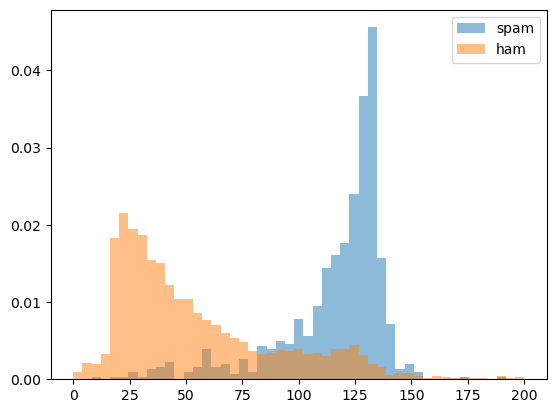

In [20]:
bins=np.linspace(0,200,50)
plt.hist(data[data.label=="spam"]['length'],bins,alpha=.5,density=True,label="spam")
plt.hist(data[data.label=="ham"]['length'],bins,alpha=.5,density=True,label="ham")
plt.legend()
plt.show()

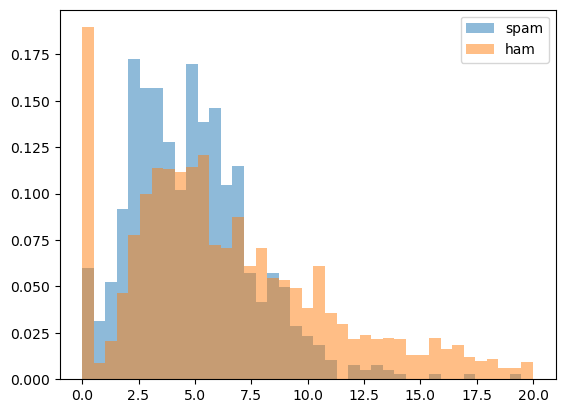

In [21]:
bins=np.linspace(0,20,40)
plt.hist(data[data.label=="spam"]['punc_percent'],bins,alpha=.5,density=True,label="spam")
plt.hist(data[data.label=="ham"]['punc_percent'],bins,alpha=.5,density=True,label="ham")
plt.legend()
plt.show()

### Box Cox transformation

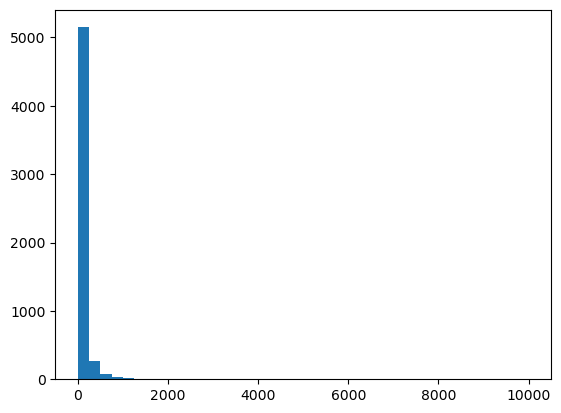

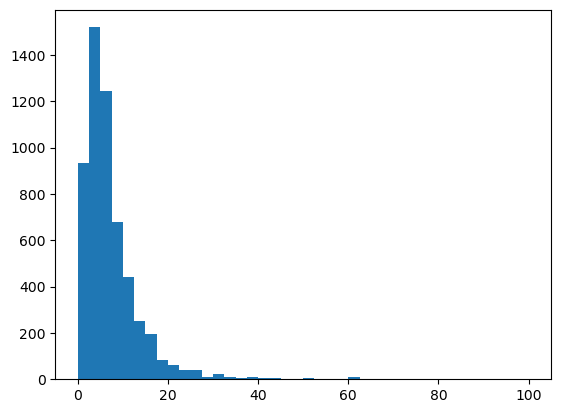

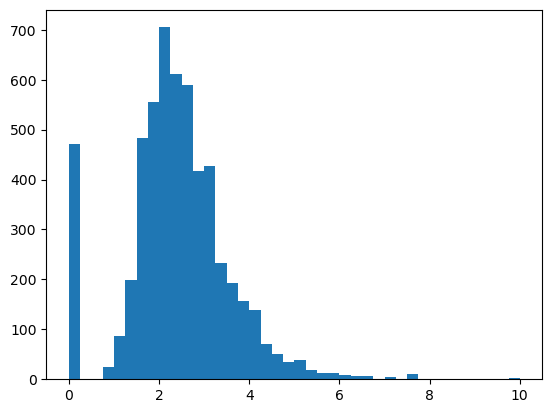

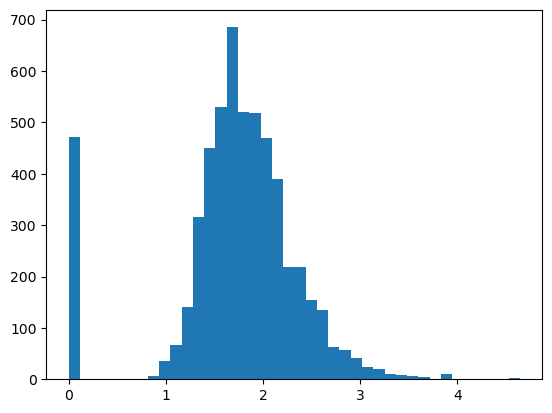

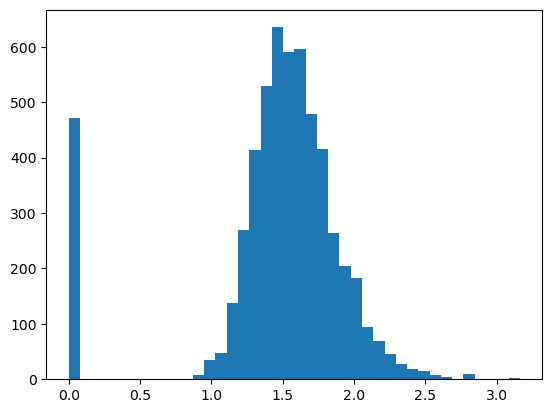

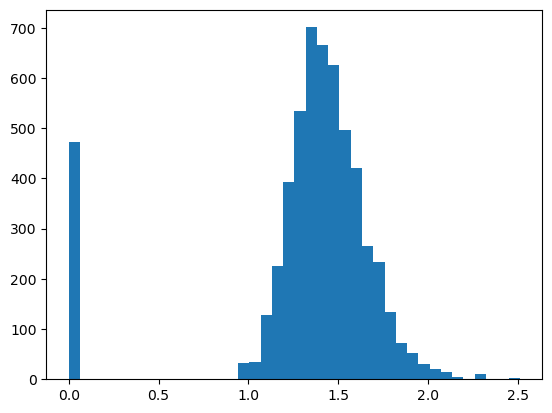

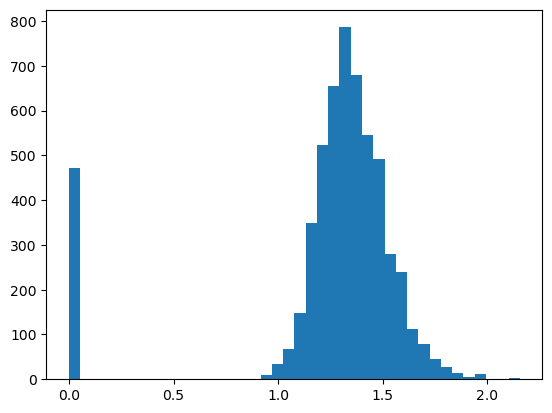

In [22]:
for i in [1/2,1,2,3,4,5,6]:
    plt.hist((data["punc_percent"])**(1/i),bins=40)
    plt.show()

In [23]:
data.punc_percent=(data["punc_percent"])**(1/3)

# Model training

In [24]:
y=data.label
x=pd.concat([data[["length","punc_percent"]],df],axis=1)
x

,length,punc_percent,008704050406,008704050406 sp,0089my,0089my last,0121,0121 2025050,01223585236,01223585236 xx,...,ãœ thk,ãœ wait,ãœ wan,ãœ wana,ãœ want,ãœ write,ãœll,ãœll take,œharry,œharry potter
0,92,2.138708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,2.924018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,1.673582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,2.487113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,1.598127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,132,1.823218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,30,1.493802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,48,2.443162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,100,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
rf=RandomForestClassifier(n_jobs=-1,random_state=1)
k_fold=KFold(n_splits=5)
cross_val_score(rf,x,y,cv=k_fold,scoring="accuracy",n_jobs=-1)

array([0.97309417, 0.97309417, 0.96947935, 0.95870736, 0.96499102])

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
rf_model=rf.fit(x_train,y_train)

In [28]:
sorted(zip(rf_model.feature_importances_,x.columns),reverse=True)[:20]

[(0.03042092642455796, 'length'),
 (0.022964225955827134, 'call'),
 (0.02234346161202723, 'txt'),
 (0.016030303505343544, 'free'),
 (0.015024524928016833, 'claim'),
 (0.014126389438372257, 'service'),
 (0.012447444133653661, 'mobile'),
 (0.009820882742823025, 'tone'),
 (0.009714907662072633, 'stop'),
 (0.00822849096694966, 'prize'),
 (0.008207720970884414, 'reply'),
 (0.008043100034714347, 'text'),
 (0.007681041833372217, 'win'),
 (0.00754881591296261, 'urgent'),
 (0.005482348348009274, 'customer'),
 (0.005263243479052502, '18'),
 (0.005225474426418689, '500'),
 (0.0050917015866397035, '1000'),
 (0.004759021590232681, '16'),
 (0.004445255614665762, '100')]

In [29]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support=score(y_test,y_pred,labels=["spam"])

In [30]:
float(precision),float(recall),float(fscore),float(support)

(1.0, 0.7333333333333333, 0.846153846153846, 195.0)

In [31]:
print("Accuracy: {}".format((y_pred==y_test).sum()/len(y_pred)))

Accuracy: 0.9626704953338119
